# Klasifikasi pada Dataset Yawn Eye

Klasifikasi dilakukan dengan menggunakan Convolutional Neural Network. Pemodelan dilakukan dengan membagi dataset ke dalam subset pelatihan, subset validasi, dan subset pengujian. Evaluasi model dilakukan dengan menggunakan metrik akurasi, presisi, recall, dan f1-score.

In [1]:
#library yang digunakan

import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#melihat folder pada direktori

path = '/kaggle/input/dataset_new'
print(os.listdir(path))

['test', 'train']


In [3]:
#membuat path

train_path = path + '/train'
test_path = path + '/test'

In [4]:
#melihat nama kelas

train_classes = os.listdir(train_path)
print(train_classes)
test_classes = os.listdir(test_path)
print(test_classes)

['Closed', 'Open', 'yawn', 'no_yawn']
['Closed', 'Open', 'yawn', 'no_yawn']


In [5]:
#menetukan ukuran data citra dan banyak channel

img_size = 224
no_channel = 3

In [6]:
#pada subset pelatihan: data citra menjadi variabel X dan kelas menjadi variabel y

X_tr = []
y_tr = []
for label in train_classes:
    data_path = os.path.join(train_path, label)
    class_num = train_classes.index(label)
    for img in os.listdir(data_path):
            try:
                img_arr = cv2.imread(os.path.join(data_path, img))[...,::-1]
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                X_tr.append(resized_arr)
                y_tr.append(class_num)
            except Exception as e:
                print(e)

In [7]:
#pada subset pelatihan: normalisasi min-max untuk variabel X dan pengkodean one-hot untuk variabel y

X_tr = np.asarray(X_tr)
X_tr = X_tr/255
y_tr = np.asarray(y_tr)
y_tr = to_categorical(y_tr)

In [8]:
#membagi subset pelatihan kedalam 80% subset pelatihan dan 20% subset validasi

X_tr, X_val, y_tr, y_val = train_test_split(X_tr, y_tr, test_size = 0.2, random_state = 1)

In [9]:
#pada subset pengujian: data citra menjadi variabel X dan kelas menjadi variabel y

X_test = []
y_test = []
for label in test_classes:
    data_path = os.path.join(test_path, label)
    class_num = test_classes.index(label)
    for img in os.listdir(data_path):
            try:
                img_arr = cv2.imread(os.path.join(data_path, img))[...,::-1]
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                X_test.append(resized_arr)
                y_test.append(class_num)
            except Exception as e:
                print(e)

In [10]:
#pada subset pengujian: normalisasi min-max untuk variabel X dan pengkodean one-hot untuk variabel y

X_test = np.asarray(X_test)
X_test = X_test/255
y_test = np.asarray(y_test)
y_test = to_categorical(y_test)

In [11]:
#menampilkan shape dari setiap variabel pada seluruh subset

print('X pelatihan shape :', X_tr.shape)
print('y pelatihan shape :', y_tr.shape)
print('X validasi shape :', X_val.shape)
print('y validasi shape :', y_val.shape)
print('X pengujian shape :', X_test.shape)
print('y pengujian shape :', y_test.shape)

X pelatihan shape : (1973, 224, 224, 3)
y pelatihan shape : (1973, 4)
X validasi shape : (494, 224, 224, 3)
y validasi shape : (494, 4)
X pengujian shape : (433, 224, 224, 3)
y pengujian shape : (433, 4)


In [12]:
#augmentasi data pada subset pelatihan

datagen = ImageDataGenerator(
        featurewise_center = False, # set input mean to 0 over the dataset
        samplewise_center = False, # set each sample mean to 0
        featurewise_std_normalization = False, # divide inputs by std of the dataset
        samplewise_std_normalization = False, # divide each input by its std
        zca_whitening = False, # apply ZCA whitening
        rotation_range = 0, # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.25, # Randomly zoom image
        width_shift_range = 0.125, # randomly shift images horizontally (fraction of total width)
        height_shift_range = 0.125, # randomly shift images vertically (fraction of total height)
        horizontal_flip = True, # randomly flip images
        vertical_flip = False) # randomly flip images
datagen.fit(X_tr)

In [13]:
#mendefinisikan model drowsiness detection menggunakan arsitektur CNN

model = Sequential([
    Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = (img_size, img_size, no_channel)),
    MaxPooling2D(),
    Conv2D(filters = 64, kernel_size = 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(filters = 128, kernel_size = 3, activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(units = 128, activation =  'relu'),
    Dense(units = 64, activation =  'relu'),
    Dense(units = 32, activation =  'relu'),
    Dropout(rate = 0.5),
    Dense(units = 4, activation = 'softmax')
])

In [14]:
#melihat model yang terbentuk

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [15]:
#compile model

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])

In [16]:
#menentukan banyak epochs

epochs = 50

In [17]:
#pelatihan model

hist = model.fit(X_tr,
                 y_tr,
                 epochs = epochs,
                 validation_data = (X_val, y_val))

Epoch 1/50
62/62 [==============================] - 9s 59ms/step - loss: 1.6239 - accuracy: 0.4724 - val_loss: 1.1509 - val_accuracy: 0.6194
Epoch 2/50
62/62 [==============================] - 2s 34ms/step - loss: 1.2508 - accuracy: 0.6629 - val_loss: 1.1508 - val_accuracy: 0.7247
Epoch 3/50
62/62 [==============================] - 2s 34ms/step - loss: 0.9746 - accuracy: 0.7096 - val_loss: 0.9827 - val_accuracy: 0.5972
Epoch 4/50
62/62 [==============================] - 2s 34ms/step - loss: 2.7176 - accuracy: 0.6437 - val_loss: 2.9223 - val_accuracy: 0.7024
Epoch 5/50
62/62 [==============================] - 2s 33ms/step - loss: 1.6620 - accuracy: 0.5778 - val_loss: 0.8553 - val_accuracy: 0.6235
Epoch 6/50
62/62 [==============================] - 2s 35ms/step - loss: 1.0525 - accuracy: 0.5590 - val_loss: 1.1704 - val_accuracy: 0.6822
Epoch 7/50
62/62 [==============================] - 2s 34ms/step - loss: 1.6878 - accuracy: 0.4232 - val_loss: 1.1661 - val_accuracy: 0.6903
Epoch 8/50
62

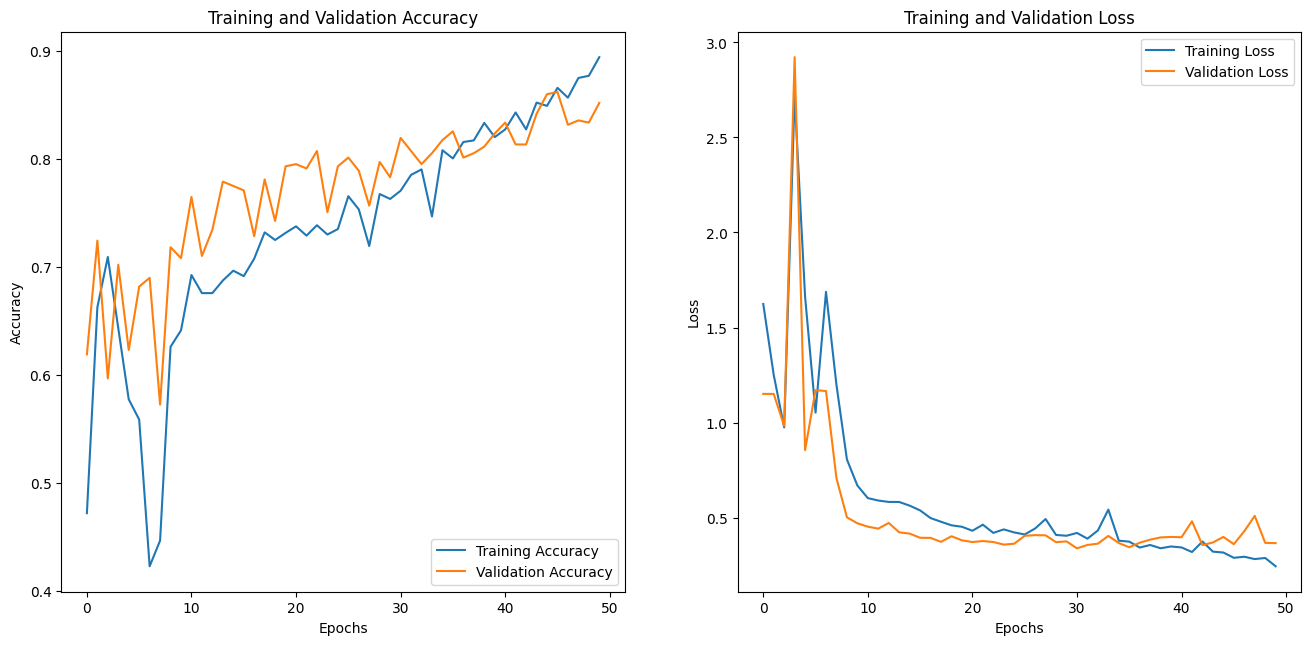

In [18]:
#grafik akurasi dan loss pada pelatihan model

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (16, 16))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [19]:
#prediksi

pred_X = model.predict(X_test)
y_pred = np.argmax(pred_X, axis = 1)
y_test = np.argmax(y_test, axis = 1)

14/14 [==============================] - 0s 21ms/step


Text(0.5, 1.0, 'CNN Confusion Matrix')

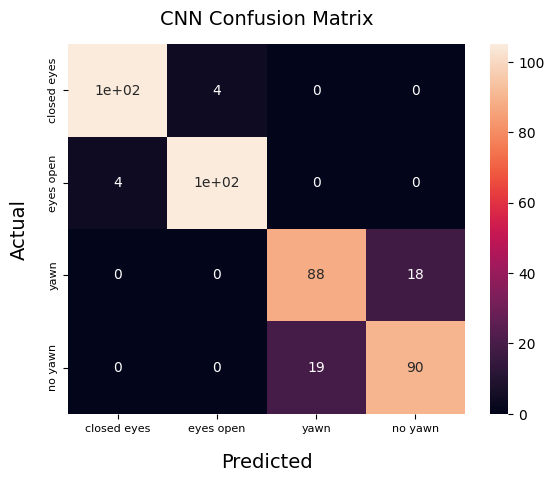

In [20]:
#confusion matrix

cm = confusion_matrix(y_test, y_pred)
hm = sns.heatmap(cm, annot = True)
hm.set_xlabel("Predicted", fontsize = 14, labelpad = 14)
hm.xaxis.set_ticklabels(['closed eyes', 'eyes open', 'yawn', 'no yawn'], fontsize = 8)
hm.set_ylabel("Actual", fontsize = 14, labelpad = 14)
hm.yaxis.set_ticklabels(['closed eyes', 'eyes open', 'yawn', 'no yawn'], fontsize = 8)
hm.set_title("CNN Confusion Matrix", fontsize = 14, pad = 14)

In [21]:
#classification report

print(classification_report(y_test, y_pred, target_names = ['closed eyes', 'eyes open', 'yawn', 'no yawn']))

              precision    recall  f1-score   support

 closed eyes       0.96      0.96      0.96       109
   eyes open       0.96      0.96      0.96       109
        yawn       0.82      0.83      0.83       106
     no yawn       0.83      0.83      0.83       109

    accuracy                           0.90       433
   macro avg       0.90      0.90      0.90       433
weighted avg       0.90      0.90      0.90       433



> * interpretasi

1. precision

precision untuk kelas closed eyes adalah sebesar 0.96, artinya model dapat memprediksi 96% data pada kelas closed eyes dengan benar

precision untuk kelas eyes open adalah sebesar 0.96, artinya model dapat memprediksi 96% data pada kelas eyes open dengan benar

precision untuk kelas yawn adalah sebesar 0.82, artinya model dapat memprediksi 82% data pada kelas yawn dengan benar

precision untuk kelas no yawn adalah sebesar 0.83, artinya model dapat memprediksi 83% data pada kelas no yawn dengan benar

rata-rata precision adalah sebesar 0.90, artinya model dapat memprediksi rata-rata 90% data dengan benar

1. recall

recall untuk kelas closed eyes adalah sebesar 0.96, artinya model dapat menghasilkan 96% prediksi yang tepat pada kelas closed eyes

recall untuk kelas eyes open adalah sebesar 0.96, artinya model dapat menghasilkan 96% prediksi yang tepat pada kelas eyes open

recall untuk kelas yawn adalah sebesar 0.83, artinya model dapat menghasilkan 83% prediksi yang tepat pada kelas yawn

recall untuk kelas no yawn adalah sebesar 0.83, artinya model dapat menghasilkan 83% prediksi yang tepat pada kelas no yawn

rata-rata recall adalah sebesar 0.90, artinya model dapat menghasilkan rata-rata 90% prediksi yang tepat

1. f1-score

f1-score untuk kelas closed eyes adalah sebesar 0.96, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas closed eyes adalah sebesar 96%

f1-score untuk kelas eyes open adalah sebesar 0.96, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas eyes open adalah sebesar 96%

f1-score untuk kelas yawn adalah sebesar 0.83, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas yawn adalah sebesar 83%

f1-score untuk kelas no yawn adalah sebesar 0.83, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas no yawn adalah sebesar 83%

rata-rata f1-score adalah sebesar 0.90, artinya rata-rata kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat adalah sebesar 90%

1. accuracy

model memiliki akurasi sebesar 0.90, artinya kemampuan model untuk dapat menghasilkan prediksi dengan benar dan tepat dari keseluhuran data yang ada adalah sebesar 90%